 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

ans-


    K-Means partitions data into a pre-defined 'k' number of spherical clusters
   
    efficiently but needs 'k' upfront;

---


    
    
    Hierarchical Clustering builds nested
   
    trees (dendrograms) revealing relationships, great for unknown 'k' and
   
    complex shapes, but computationally expensive for large datasets


---




    K-Means suits customer segmentation (large scale, known segments),
    
    while
  
    Hierarchical suits taxonomy/biology (exploring nested structures, unknown
  
    counts).

 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

ans-

    the purpose of silhouette score is to provide a single, interpretable

    metric for assessing clustering effectiveness, helping to determine the

    optimal number of clusters and validate algorithm performance.

   

---


   
 **Key Purposes:**

 **Measures Cluster Quality:**

  
  
    Quantifies how well-grouped data points are within their clusters and how
  
    distinct they are from other clusters.


**Balances Cohesion & Separation:**

    Considers both intra-cluster (within-cluster) tightness and inter-cluster
    
    (between-cluster) distance.


**Evaluates Data Point Fit:**

    For each point, it assesses if it's better suited to its current cluster or
    
    a neighboring one.


**Assesses Algorithm Performance:**


    Helps compare different clustering algorithms or parameter settings (like
    
    the number of clusters, k).



3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

ans-



    DBSCAN's core parameters are ε (Epsilon/eps), the neighborhood radius,
    
    and MinPts, the minimum points in that radius to form a dense region
     
    (core point), defining cluster density and shape, with smaller ε or
      
    larger MinPts leading to more clusters/noise and larger ε or smaller
      
    MinPts merging clusters or creating less distinct ones, impacting noise
    
    handling and cluster granularity.



**Core Parameters**


**Epsilon (ε or eps):**


**Definition:**

    The maximum distance between two data points for them to be considered
    
    neighbors.

**Influence:**


Too small ε:

    May classify many points as noise or split a cluster into many small ones.


Too large ε:

    Might merge distinct clusters into a single large one, failing to capture true groupings.


---


**Minimum Points (MinPts):**


**Definition**:

    The minimum number of points required within the ε-neighborhood for a point
    
    to be considered a core point (the heart of a cluster).


**Influence:**


**Higher MinPts:**

    Makes the algorithm stricter, requiring denser regions, resulting in fewer,

    more robust clusters and potentially more noise points.


**Lower MinPts**:

    Can lead to more, smaller clusters and potentially group noise points into
   
    clusters. A common starting point is MinPts = 3 for 2D data.

4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?


ans-

    Feature scaling is vital for K-Means and DBSCAN because they are
    
    distance-based, and without scaling, features with larger numerical ranges
    
    (like income) would dominate distance calculations over smaller-range
     
    features (like age), leading to biased clusters where the algorithm
     
    ignores important patterns in less-varied features, ensuring all features
     
    contribute equally to defining cluster shapes and densities.

5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

ans-

    The Elbow Method in K-Means clustering is a visual technique to find the
  
    optimal number of clusters (k) by plotting the Within-Cluster Sum of Squares
  
    (WCSS) (or inertia) against different 'k' values


---



   **How it works:**


**Run K-Means for various 'k'**:

    Apply the K-Means algorithm to your dataset for a range of 'k' values (e.g., k=1 to 10).


**Calculate WCSS:**

    For each 'k', calculate the WCSS (sum of squared distances from each point
    
    to its cluster's centroid).


**Plot the results:**

    Create a line graph with 'k' on the x-axis and WCSS on the y-axis.


**Identify the elbow**:

    Look for the point where the graph bends sharply, resembling an elbow.
    
    Before this point, WCSS drops quickly; after, it decreases much more slowly.


**Choose the 'k':**


    The 'k' value at the elbow is considered the optimal number of clusters, as



    adding more clusters beyond this point yields minimal improvement in cluster cohesion.

6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

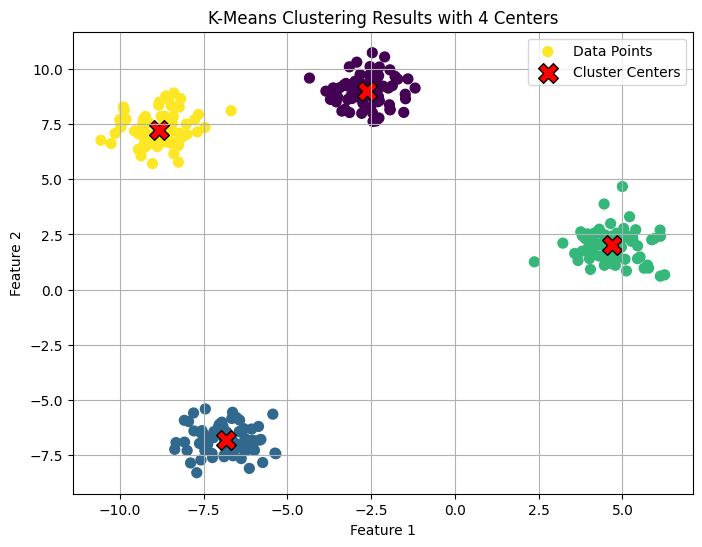

In [2]:
!pip install numpy matplotlib scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
n_samples = 300
n_centers = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_centers, random_state=42, cluster_std=0.70)
# X contains the features (data points), y_true contains the true cluster labels (which we won't use for clustering itself)

# 2. Apply KMeans clustering
# We specify the number of clusters we expect (n_centers)
kmeans = KMeans(n_clusters=n_centers, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Cluster Centers')

plt.title(f'K-Means Clustering Results with {n_centers} Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).


In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data # Feature data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Standardize features

# 3. Train a DBSCAN model
# Default parameters (eps=0.5, min_samples=5) may not find meaningful clusters
# in this high-dimensional dataset without parameter tuning (e.g., using PCA first or an elbow method
# for eps like k-distance graph).
# For demonstration purposes, we use the defaults here.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_ # Cluster labels for each point

# 4. Print the number of clusters found (excluding noise)
# Noise points are labeled as -1 by DBSCAN.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters found: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# To find more meaningful clusters, consider tuning the 'eps' and 'min_samples' parameters.


Estimated number of clusters found: 0
Estimated number of noise points: 178


 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


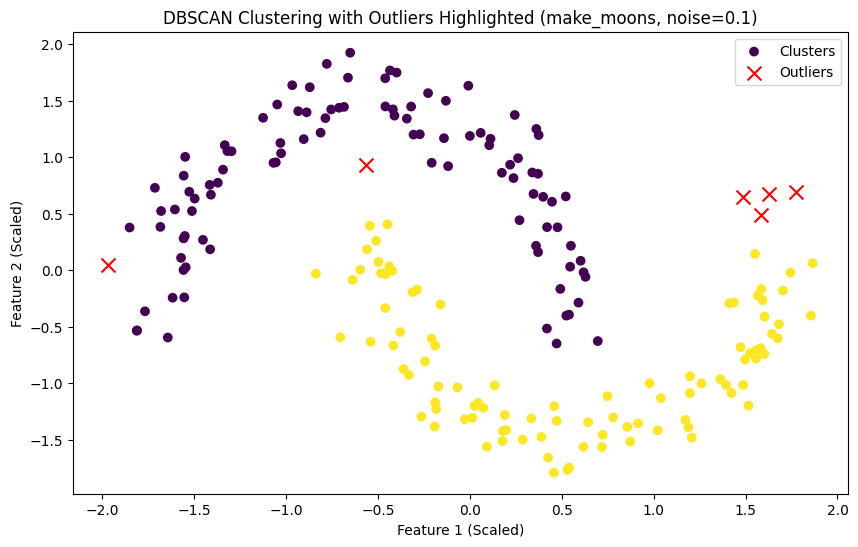

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Standardize the data (often helps DBSCAN performance, though not strictly required here)
X = StandardScaler().fit_transform(X)

# 2. Apply DBSCAN
# Parameters for DBSCAN might need tuning based on the specific noise level.
# A common practice is to use a k-distance graph to find an optimal 'eps' value.
# For this data with noise=0.1, eps=0.3 works reasonably well.
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Highlight the outliers in the plot
# Outliers have a cluster label of -1
outliers_mask = (clusters == -1)
clustered_mask = (clusters != -1)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot clustered points in different colors
plt.scatter(X[clustered_mask, 0], X[clustered_mask, 1], c=clusters[clustered_mask], cmap='viridis', label='Clusters')

# Highlight outliers in a distinct color (e.g., red and a different marker)
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering with Outliers Highlighted (make_moons, noise=0.1)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()


9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


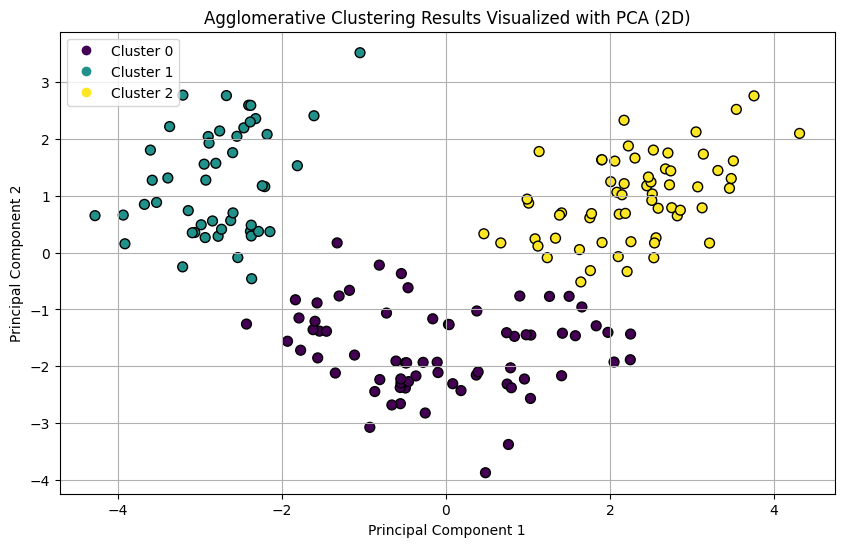

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target # The true labels are used for coloring the plot for comparison
target_names = wine.target_names

# 2. Standardize the data
# PCA is affected by scale, so features must be scaled before application
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
# Retain the top two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# We know the wine data has 3 actual classes, so we set n_clusters=3 for comparison
# 'ward' linkage minimizes the variance of the clusters being merged
agglomerative_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
# Fit the model and predict the cluster labels
y_pred = agglomerative_model.fit_predict(X_pca)

# 5. Visualize the result in 2D with a scatter plot
plt.figure(figsize=(10, 6))

# Plot data points, colored by the *predicted* cluster labels
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50)

# Add title and labels
plt.title('Agglomerative Clustering Results Visualized with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend
legend_labels = [f'Cluster {i}' for i in range(len(target_names))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.grid(True)
plt.show()


10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?



Which clustering algorithm(s) would you use and why?
ans-
    For e-commerce customer segmentation, a typical data science workflow
    
    involves data prep (RFM, demographics, behavior), K-means clustering for
    
    efficiency on large data (with Elbow/Silhouette for 'k'), DBSCAN/
    
    Hierarchical if density/structure matters, then profiling segments (e.g.,
    
    High-Value Loyalists, Bargain Hunters) for targeted campaigns, using tools
    
    like SQL/Python (Scikit-learn) and evaluating with A/B tests; K-means is
     
    often preferred for speed and simplicity in large datasets, while DBSCAN
      
    handles irregular shapes, and Hierarchical offers deep structure but is
      
    slower.

How would you preprocess the data (missing values, scaling)?

ans- **Data Cleaning & Transformation:**

    Clean the dataset by handling missing values, duplicates, and outliers,
    
    preparing it for effective clustering.


**Feature Engineering**:

    Develop new features based on the transactional data to create a
    
    customer-centric dataset, setting the foundation for customer segmentation.

    
**Data Preprocessing**:


    Undertake feature scaling and dimensionality reduction to streamline the
    
    data, enhancing the efficiency of the clustering process.


**Customer Segmentation using K-Means Clustering:**

    Segment customers into distinct groups using K-means, facilitating targeted
    
    marketing and personalized strategies.

**Cluster Analysis & Evaluation:**

    Analyze and profile each cluster to develop targeted marketing strategies
    
    and assess the quality of the clusters formed.


**Recommendation System:**

    Implement a system to recommend best-selling products to customers within
    
    the same cluster who haven't purchased those products, aiming to boost
    
    sales and marketing effectiveness.




How would you determine the number of clusters?

    To segment e-commerce customers with clustering, i would follow a workflow:
  
    Define Goals & Data, Preprocess Data (clean, engineer features like RFM,
  
    scale), Choose Algorithm (like K-Means), Determine K (Clusters) using Elbow
  
    Method/Silhouette Score, Train Model, Profile Clusters, and Deploy for
  
    Marketing, with K-Means needing specific methods like Elbow for choosing 'K'
  
    (number of groups) to balance data fit and interpretability, often balancing
   
    business needs with statistical measures.